In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix,roc_curve
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [2]:
df=pd.read_csv(r'path\to\diabetes.csv')

### Exploratory Data Analysis

In [18]:
def create_subplot(df):
    warnings.filterwarnings("ignore") ##stick to the current version of seaborn
    ### create a subplot of 3 x 3
    plt.subplots(3,3,figsize=(15,15))
    ### plot a density plot for each variable
    for index, col in enumerate(df.columns):
        ax=plt.subplot(3,3,index+1)
        ax.yaxis.set_ticklabels([])
        sns.distplot(df.loc[df.Outcome==0][col],
                     hist=False,
                     axlabel=False,
                     kde_kws={'linestyle':'-',
                             'color':'purple',
                             'label':"No Diabetes"})
        sns.distplot(df.loc[df.Outcome==1][col],
                   hist=False,
                   axlabel=False,
                   kde_kws={'linestyle':'--',
                           'color':'gray',
                           'label':"Diabetes"})
        ax.set_title(col)
        ax.legend(loc='upper right')
    plt.subplot(3,3,9).set_visible(False)
    plt.show()

No handles with labels found to put in legend.


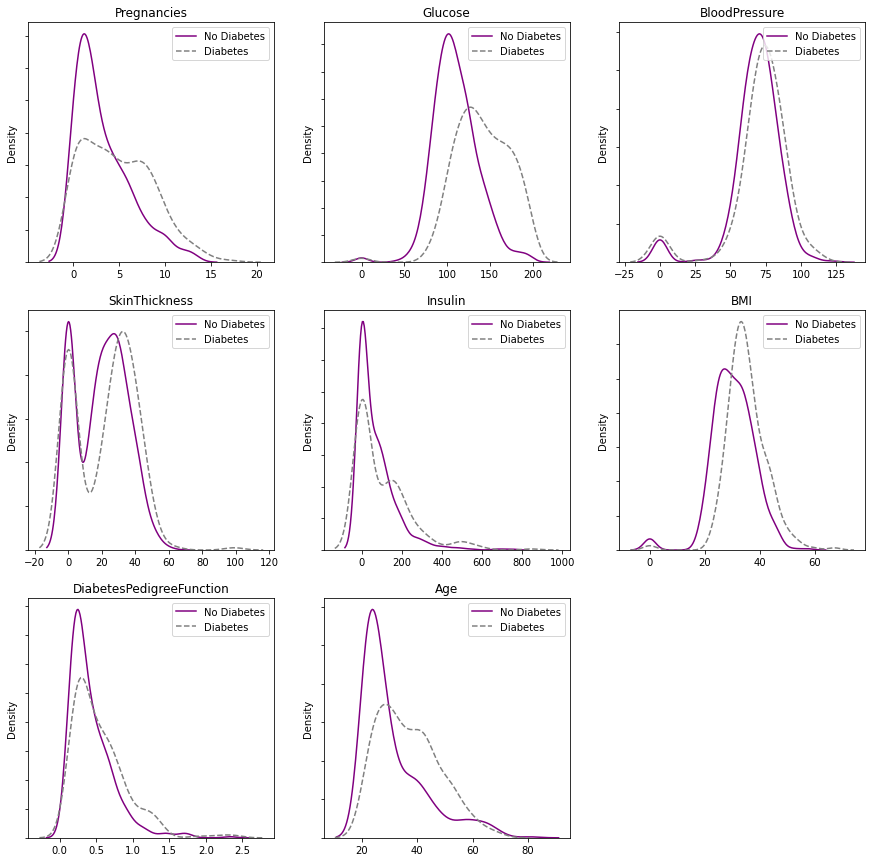

In [19]:
create_subplot(df)

In [5]:
def data_cleaning(df):
    print('---------------------------------------------------------------------------------------------------------------')
    print('Number of rows with 0 values for each variable:')
    for col in df.columns:
        missing_rows=df.loc[df[col]==0].shape[0]
        print('{0}: {1}'.format(col,str(missing_rows)))
    ### replace 0s on columns where it doesn't make sense having 0s
    print('---------------------------------------------------------------------------------------------------------------')
    col_toreplace=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    print('Replacing values in {}'.format(col_toreplace))
    for col in df[col_toreplace]:
        df[col]=df[col].replace(0,np.nan)
        df[col]=df[col].fillna(df[col].mean())
    print('---------------------------------------------------------------------------------------------------------------')
    print('Check 0 values for each variable after cleansing:')
    for col in df.columns:
        missing_rows=df.loc[df[col]==0].shape[0]
        print('{0}: {1}'.format(col,str(missing_rows)))
    return df

In [6]:
df=data_cleaning(df)

---------------------------------------------------------------------------------------------------------------
Number of rows with 0 values for each variable:
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
---------------------------------------------------------------------------------------------------------------
Replacing values in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
---------------------------------------------------------------------------------------------------------------
Check 0 values for each variable after cleansing:
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [7]:
def preprocessing_data(df):
    ### using sklearn preprocessing
    df_scaled=preprocessing.scale(df)
    df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
    df_scaled['Outcome']=df['Outcome']
    df=df_scaled
    print(df.describe().loc[['mean','std','max'],].round(2).abs())

In [8]:
preprocessing_data(df)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [9]:
def split_data(df):
    X=df.loc[:,df.columns!='Outcome']
    y=df.loc[:,'Outcome']

    #### making our first split so the data can be 80% training set and testing set 20%
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

    #### make the second split to reate the final training set and the validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)
    return X_train,X_val,y_train,y_val,X_test,y_test

In [10]:
X_train,X_val,y_train,y_val,X_test,y_test=split_data(df)

In [11]:
def train_model(X_train, y_train, iterations):
    timestamp=time.time()
    print('[{}] '.format())
    model=Sequential() ## using 32 nodes bcause 
    model.add(Dense(32, activation='relu', input_dim=8)) ## first layer, after this keras takes care of input compatibility
    model.add(Dense(16, activation='relu')) ## 2nd layer
    model.add(Dense(1, activation='sigmoid')) ## final layer

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=iterations)
    print('{} ')
    return model, X_train, y_train

In [12]:
model,X_train,y_train=train_model(X_train,y_train,100)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 35.8592 - accuracy: 0.3269
Epoch 2/100
16/16 [==============================] - 0s 666us/step - loss: 4.5162 - accuracy: 0.5196
Epoch 3/100
16/16 [==============================] - 0s 800us/step - loss: 4.9134 - accuracy: 0.5715
Epoch 4/100
16/16 [==============================] - 0s 867us/step - loss: 1.9445 - accuracy: 0.5150
Epoch 5/100
16/16 [==============================] - 0s 800us/step - loss: 1.6122 - accuracy: 0.5065
Epoch 6/100
16/16 [==============================] - 0s 734us/step - loss: 1.2591 - accuracy: 0.5985
Epoch 7/100
16/16 [==============================] - 0s 733us/step - loss: 1.1181 - accuracy: 0.5808
Epoch 8/100
16/16 [==============================] - 0s 800us/step - loss: 0.9714 - accuracy: 0.6385
Epoch 9/100
16/16 [==============================] - 0s 666us/step - loss: 0.8874 - accuracy: 0.6704
Epoch 10/100
16/16 [==============================] - 0s 800us/step - loss: 0.8927 - accurac

## testing / evaluating model

In [13]:
def test_accuracy(model,X_train,y_train):
    ### testing accuracy
    scores=model.evaluate(X_train, y_train)
    print('Training accuracy: {}%'.format(round(scores[1]*100,2)))
    scores=model.evaluate(X_test,y_test)
    print('Testing accuracy: {}%'.format(round(scores[1]*100,2)))

In [14]:
test_accuracy(model,X_train,y_train)

16/16 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7576
Training accuracy: 75.76%
5/5 [==============================] - 0s 750us/step - loss: 0.5783 - accuracy: 0.7468
Testing accuracy: 74.68%


In [15]:
def return_img_encodingb64(fig):
    #### generic function to return img in encodign b64 to html template
    tmpfile=BytesIO()
    fig.savefig(tmpfile,format='png')
    encoded=base64.b64encode(tmpfile.getvalue()).decode('utf-8')
    src = 'data:image/png;base64,{}'.format(encoded)
    return src

In [16]:
def con_matrix(X_test, y_test):
    fig, ax=plt.subplots()
    y_test_pred=model.predict_classes(X_test)
    c_matrix=confusion_matrix(y_test,y_test_pred)
    ax=sns.heatmap(
        c_matrix,
        cmap='BuPu',
        annot=True,
        fmt='g',
        xticklabels=['No Diabetes','Diabetes'],
        yticklabels=['No Diabetes','Diabetes']
    )
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Actual')
    fig.tight_layout()
    src=return_img_encodingb64(fig)
    return(src)

In [18]:
def ROC_curve(X_test,y_test):
    ### ROC curve
    y_test_pred_probs=model.predict(X_test)
    FPR, TPR, _ = roc_curve(y_test,y_test_pred_probs)
    plt.plot(FPR,TPR,color='purple')
    plt.plot([0,1],[0,1],'-.',color='black')
    #diagonal line
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    src=return_img_encodingb64(plt)
    return src